# Task #3

# Part I

Develop yourself using numpy library: 

a) python function for implementation of gradient descent (GD) with momentum algorithm for the function of two variables f(x,y).

b) python function for implementation of ADAM optimization algorithm for the function of two variables f(x,y).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"

In [2]:
def gradient_descent_with_momentum(f, grad_f, lr=0.05, beta=0.9, tol=1e-6, max_iter=1000, init_point=(0,0)):
    x, y = init_point
    v_x, v_y = 0, 0
    history = [(x, y)]
    for _ in range(max_iter):
        dx, dy = grad_f(x, y)
        # Here v_x and v_y are from the prev iteration, and dx/dy are gradients in the current iterarion
        v_x = beta * v_x + lr * dx
        v_y = beta * v_y + lr * dy
        x, y = x - v_x, y - v_y
        history.append((x, y))
        if np.sqrt(dx**2 + dy**2) < tol:
            break
    return x, y, history

def adam(f, grad_f, lr=0.05, beta1=0.9, beta2=0.999, epsilon=1e-8, tol=1e-6, max_iter=1000, init_point=(0,0)):
    x, y = init_point
    m_x, m_y = 0, 0
    v_x, v_y = 0, 0
    history = [(x, y)]
    for i in range(1, max_iter+1):
        dx, dy = grad_f(x, y)
        
        m_x = beta1 * m_x + (1 - beta1) * dx
        m_y = beta1 * m_y + (1 - beta1) * dy
        
        v_x = beta2 * v_x + (1 - beta2) * (dx**2)
        v_y = beta2 * v_y + (1 - beta2) * (dy**2)
        
        m_x_corr = m_x / (1 - beta1**i)
        m_y_corr = m_y / (1 - beta1**i)
        
        v_x_corr = v_x / (1 - beta2**i)
        v_y_corr = v_y / (1 - beta2**i)
        
        x = x - lr * m_x_corr / (np.sqrt(v_x_corr) + epsilon)
        y = y - lr * m_y_corr / (np.sqrt(v_y_corr) + epsilon)
        
        history.append((x, y))
        if np.sqrt(dx**2 + dy**2) < tol:
            break
    return x, y, history

# Part II

Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

In [3]:
def f(x, y):
    return x**2 + y**2 + np.sin(x) + np.cos(y) + x + y

def grad_f(x, y):
    return 2*x + np.cos(x) + 1, 2*y - np.sin(y) +  1

In [4]:
min_gd_x, min_gd_y, history_gd = gradient_descent_with_momentum(f, grad_f, init_point=(1,1))
min_adam_x, min_adam_y, history_adam = adam(f, grad_f, init_point=(1,1))

In [5]:
print("Gradient Descent with Momentum Algorithm:")
print("x and y:", history_gd[-1])
print("f value:", f(min_gd_x, min_gd_y))

print("-----------------------------------------")

print("ADAM Optimization Algorithm:")
print("x and y:", history_adam[-1])
print("f value:", f(min_adam_x, min_adam_y))

Gradient Descent with Momentum Algorithm:
x and y: (-0.8354298546197807, -0.8878629911096197)
f value: -0.34756286747532494
-----------------------------------------
ADAM Optimization Algorithm:
x and y: (-0.8354295634774652, -0.8878615887815839)
f value: -0.3475628674755741


# Part III

Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N or in the form of 2D-plane graph.

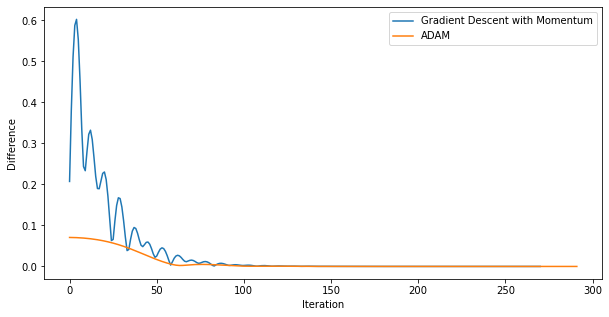

In [6]:
# Calculate difference between successive points
# Using Euclidean distance
diff_curr_gd = [np.sqrt((history_gd[i+1][0]-history_gd[i][0])**2 + (history_gd[i+1][1]-history_gd[i][1])**2) for i in range(len(history_gd)-1)]
diff_prev_gd = [np.sqrt((history_gd[i][0]-history_gd[i-1][0])**2 + (history_gd[i][1]-history_gd[i-1][1])**2) for i in range(1, len(history_gd))]

diff_curr_adam = [np.sqrt((history_adam[i+1][0]-history_adam[i][0])**2 + (history_adam[i+1][1]-history_adam[i][1])**2) for i in range(len(history_adam)-1)]
diff_prev_adam = [np.sqrt((history_adam[i][0]-history_adam[i-1][0])**2 + (history_adam[i][1]-history_adam[i-1][1])**2) for i in range(1, len(history_adam))]

# Plot
plt.figure(figsize=(10,5))
plt.plot(diff_curr_gd, label="Gradient Descent with Momentum")
plt.plot(diff_curr_adam, label="ADAM")
plt.xlabel("Iteration")
plt.ylabel("Difference")
plt.legend()
plt.show()

In [7]:
def road_to_min_plot(f, x_range, y_range, x_seq, y_seq, Algorithm):
    X, Y = np.meshgrid(x_range, y_range)
    Z = f(X, Y)

    fig = go.Figure(data=go.Contour(z=Z, x=x_range, y=y_range, contours_coloring="lines"))
    fig.add_trace(go.Scatter(x=x_seq, y=y_seq, mode='lines+markers', line=dict(color="blue")))
    fig.update_layout(title_text = Algorithm, xaxis_title='x', yaxis_title='y', width=800, height=500)
    fig.show()


In [8]:
# Set range for x and y for visualization
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-2, 2, 400)

# Gradient Descent with Momentum
history_gd_x = [item[0] for item in history_gd]
history_gd_y = [item[1] for item in history_gd]

road_to_min_plot(f, x_range, y_range, history_gd_x, history_gd_y, "Gradient Descent with Momentum Algorithm")

In [9]:
history_adam_x = [item[0] for item in history_adam]
history_adam_y = [item[1] for item in history_adam]

In [10]:
road_to_min_plot(f, x_range, y_range, history_adam_x, history_adam_y, "ADAM Optimization Algorithm")

# Part IV

Write a conclusions about the accuracy of the implemented algorithms.

In [11]:
n_iter_gd = len(history_gd)
n_iter_adam = len(history_adam)
n_iter_gd, n_iter_adam

(272, 293)

Conclusions:

Both Gradient Descent with Momentum and ADAM are effective methods for optimizing functions.

In many cases, ADAM can converge faster than gradient descent with momentum because it adjusts the learning rates individually for each parameter.

The accuracy of these methods depends on the choice of hyperparameters, the function being optimized, and the initial point.

In our case both algoritms were accurate: They both reached global (the only one) minima of -0.347563 with x = -0.83543 and y = -0.887862 (According to WolframAlpha), resulting x and y were close with no significant error. With my specifications Gradient Descent with Momentum was slightly faster than ADAM algorithm (272 and 293 respectively). However, as can be seen from the graphs, ADAM's path to global minima was smoother. 